<h1> <center> Life Sciences Data Exploration
    
    Propose and Develop an Optimal Method

# Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
import umap

import seaborn as sns


from sklearn.svm import SVR
from sklearn import linear_model, datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn  as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Importation des données

In [2]:
dftest = pd.read_table("test_data.txt",delimiter=",",header=None,index_col=0)
print(dftest)

       1         2      3      4      5      6      7      8      9      10  \
0                                                                             
1   0.135  0.000007  0.067  0.078  0.202  2.033  0.178  1.074  1.336  1.576   
1   0.143  0.000007  0.073  0.081  0.219  1.236  0.107  0.612  0.904  0.894   
1   0.162  0.000008  0.087  0.089  0.260  1.338  0.117  0.630  0.948  1.017   
1   0.140  0.000007  0.075  0.089  0.224  1.086  0.094  0.556  0.747  0.823   
1   0.150  0.000007  0.080  0.097  0.240  1.049  0.091  0.533  0.698  0.777   
..    ...       ...    ...    ...    ...    ...    ...    ...    ...    ...   
28  0.257  0.000018  0.105  0.122  0.315  5.665  0.544  2.612  3.390  5.655   
28  0.311  0.000021  0.129  0.148  0.388  5.492  0.536  2.422  2.959  5.701   
28  0.434  0.000029  0.178  0.229  0.534  5.048  0.549  2.284  3.082  5.219   
28  0.464  0.000031  0.195  0.227  0.585  4.739  0.536  2.144  2.940  4.905   
28  0.474  0.000031  0.179  0.230  0.538  5.221  0.6

In [3]:
dftrain = pd.read_table("train_data.txt",delimiter=",",header=None,index_col=0)
print(dftrain)

       1         2      3      4      5       6      7      8       9   \
0                                                                        
1   1.488  0.000090  0.900  0.794  2.699   8.334  0.779  4.517   4.609   
1   0.728  0.000038  0.353  0.376  1.059   5.864  0.642  2.058   3.180   
1   1.220  0.000074  0.732  0.670  2.196   8.719  0.875  4.347   5.166   
1   2.502  0.000123  1.156  1.634  3.469  13.513  1.273  5.263   8.771   
1   3.509  0.000167  1.715  1.539  5.145   9.112  1.040  3.102   4.927   
..    ...       ...    ...    ...    ...     ...    ...    ...     ...   
40  5.127  0.000398  2.721  2.510  8.162   9.846  0.965  4.593   6.806   
40  1.757  0.000133  0.808  0.690  2.425   7.571  0.740  2.720   3.927   
40  2.912  0.000226  1.141  1.266  3.423  15.489  1.456  6.433  10.138   
40  3.788  0.000275  1.786  1.484  5.359  15.702  1.367  6.374  11.094   
40  1.809  0.000149  0.680  0.843  2.040   7.881  0.782  2.690   4.543   

        10  ...       19    20    21 

In [4]:
Xtest_ini = dftest.loc[:,:26]
ytest_ini = dftest.loc[:,27]


Xtrain_ini = dftrain.iloc[:,:26]
ytrain_ini = dftrain.iloc[:,27]
print(ytrain_ini)

In [5]:
dftrain2 = pd.read_table("train_data.txt",delimiter=",",header=None,index_col=0)
#print(dftrain.shape)
#print(dftrain2.loc[:,1:26])
#print(dftrain2.loc[:,28])


In [6]:


frames =[dftrain2.loc[:,1:26],dftrain2.loc[:,28]]
dftrain = pd.concat(frames, axis=1)
Xtrain_ini = dftrain.loc[:,1:26]
ytrain_ini = dftrain.loc[:,28]

print(Xtrain_ini)
print(ytrain_ini)

       1         2      3      4      5       6      7      8       9   \
0                                                                        
1   1.488  0.000090  0.900  0.794  2.699   8.334  0.779  4.517   4.609   
1   0.728  0.000038  0.353  0.376  1.059   5.864  0.642  2.058   3.180   
1   1.220  0.000074  0.732  0.670  2.196   8.719  0.875  4.347   5.166   
1   2.502  0.000123  1.156  1.634  3.469  13.513  1.273  5.263   8.771   
1   3.509  0.000167  1.715  1.539  5.145   9.112  1.040  3.102   4.927   
..    ...       ...    ...    ...    ...     ...    ...    ...     ...   
40  5.127  0.000398  2.721  2.510  8.162   9.846  0.965  4.593   6.806   
40  1.757  0.000133  0.808  0.690  2.425   7.571  0.740  2.720   3.927   
40  2.912  0.000226  1.141  1.266  3.423  15.489  1.456  6.433  10.138   
40  3.788  0.000275  1.786  1.484  5.359  15.702  1.367  6.374  11.094   
40  1.809  0.000149  0.680  0.843  2.040   7.881  0.782  2.690   4.543   

        10  ...      17       18     

# Classification non supervisée (non utilisé)

In [7]:
def KM (cluster,X,Y):
    data = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1)
    data.fit(X)
    print("metric_homogeneity_score =" , metrics.homogeneity_score(Y, data.labels_))
    print("metrics.completeness = " , metrics.completeness_score(Y, data.labels_))
    print("metrics.v_mesure_score = ", metrics.v_measure_score(Y, data.labels_))
    print("metrics.adjusted_rand_score = ", metrics.adjusted_rand_score(Y, data.labels_))
    print("metrics.silouhette = ",metrics.silhouette_score(X, data.labels_, metric='euclidean', sample_size=None, random_state=None))
    return "End"


In [8]:
KM(2,Xtrain_ini,ytrain_ini)

metric_homogeneity_score = 0.0006515751554049919
metrics.completeness =  0.0027703804859005796
metrics.v_mesure_score =  0.0010550172385887075
metrics.adjusted_rand_score =  -9.241538794536117e-06
metrics.silouhette =  0.7409777926006139


'End'

In [9]:

linkage = ["ward","average","complete"]
def clustering (cluster,X,Y,linkage):
    data = AgglomerativeClustering(linkage=linkage, n_clusters=cluster)
    data.fit(X)
    print("metric_homogeneity_score =" , metrics.homogeneity_score(Y, data.labels_))
    print("metrics.completeness = " , metrics.completeness_score(Y, data.labels_))
    print("metrics.v_mesure_score = ", metrics.v_measure_score(Y, data.labels_))
    print("metrics.adjusted_rand_score = ", metrics.adjusted_rand_score(Y, data.labels_))
    print("metrics.silouhette = ",metrics.silhouette_score(X, data.labels_, metric='euclidean', sample_size=None, random_state=None))
    return "End"

def spectral (k,X,Y):
    data = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors")
    data.fit(X)
    print("metric_homogeneity_score =", metrics.homogeneity_score(Y, data.labels_))
    print("metrics.completeness = ", metrics.completeness_score(Y, data.labels_))
    print("metrics.v_mesure_score = ", metrics.v_measure_score(Y, data.labels_))
    print("metrics.adjusted_rand_score = ", metrics.adjusted_rand_score(Y, data.labels_))
    print("metrics.silouhette = ", metrics.silhouette_score(X, data.labels_, metric='euclidean', sample_size=None, random_state=None))
    return "End "



In [10]:
clustering(2,Xtrain_ini,ytrain_ini,'ward')

metric_homogeneity_score = 0.00029327748896948273
metrics.completeness =  0.0008894451167092807
metrics.v_mesure_score =  0.0004411080487549527
metrics.adjusted_rand_score =  -0.00012665724567369752
metrics.silouhette =  0.6772061425945465


'End'

In [11]:
clustering(2,Xtrain_ini,ytrain_ini,'complete')

metric_homogeneity_score = 0.006763670320777455
metrics.completeness =  0.11613388846110212
metrics.v_mesure_score =  0.012782863100070808
metrics.adjusted_rand_score =  0.00015547894064997755
metrics.silouhette =  0.8308118644055638


'End'

In [12]:
clustering(2,Xtrain_ini,ytrain_ini,'average')

metric_homogeneity_score = 0.002890635094522712
metrics.completeness =  0.10144614835657104
metrics.v_mesure_score =  0.005621100956809068
metrics.adjusted_rand_score =  2.2210951508976705e-05
metrics.silouhette =  0.8512657775447356


'End'

In [13]:
spectral(2,Xtrain_ini,ytrain_ini)

metric_homogeneity_score = 0.006452322607588218
metrics.completeness =  0.007823764282213473
metrics.v_mesure_score =  0.007072169221753516
metrics.adjusted_rand_score =  0.006104306410369894
metrics.silouhette =  0.5009721893384


'End '

In [14]:
logreg = linear_model.LogisticRegression(C=1e5)
a=logreg.fit(Xtrain_ini, ytrain_ini)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:

X_train, X_test, y_train, y_test = train_test_split(Xtrain_ini, ytrain_ini, test_size=0.2)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [16]:
print(predictions)

[ 0.4853947   0.82244287  0.49767009  0.31146959  0.33207299  0.47300671
 -0.01214803  0.46365231  0.48701645  0.21485338  0.70328881  0.32152609
  0.51313404  0.83750816  0.64227147  0.30665004  0.8389091   0.51491955
  0.44588247  0.41042138  0.63237716  0.69863323  0.72211247  0.53423728
  0.49793848  0.6962342   0.35542086  0.5468769   0.30049182  0.38385369
  0.49401373  0.45991865  0.52693947  0.4959732   0.78300318  0.35254125
  0.48150462  0.82983676  0.51645742  0.28749076  0.64349593  0.48814151
  0.61232391  0.63841449  0.37020801  0.80983937  0.45321628  0.47656278
 -0.24322532  0.28010069  0.12587546  0.48831018  0.59571952  0.50652995
  0.49274192  0.53212881  0.55236806  0.51485334  0.53319418  0.41969371
  0.11612728  0.13596902  0.56217693  0.74008029  0.41244222  0.65228075
  0.92283023  0.60991372  0.4718805   1.04465463  0.42161443  0.59182261
  0.42838262  0.60910565  0.23830381  0.73781834  0.51495653  0.58748024
  0.41779492  0.30098949  0.21732353  0.44820083  0

In [17]:
print ("Score:", model.score(X_test, y_test))


Score: 0.08948893653808287


# Représentation UMAP

(40, 2)


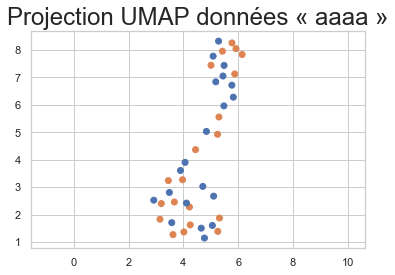

In [25]:

reducer = umap.UMAP()
embedding = reducer.fit_transform(Xtraina)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in ytraina])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection UMAP données « aaaa »', fontsize=24);


plt.show()


(1040, 2)


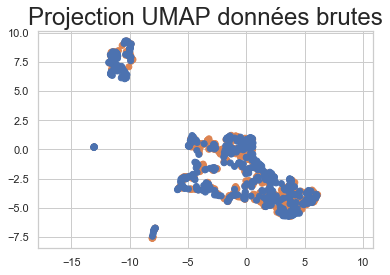

In [19]:

reducer = umap.UMAP()
embedding = reducer.fit_transform(Xtrain_ini)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in ytrain_ini])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projection UMAP données brutes', fontsize=24);


plt.show()


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


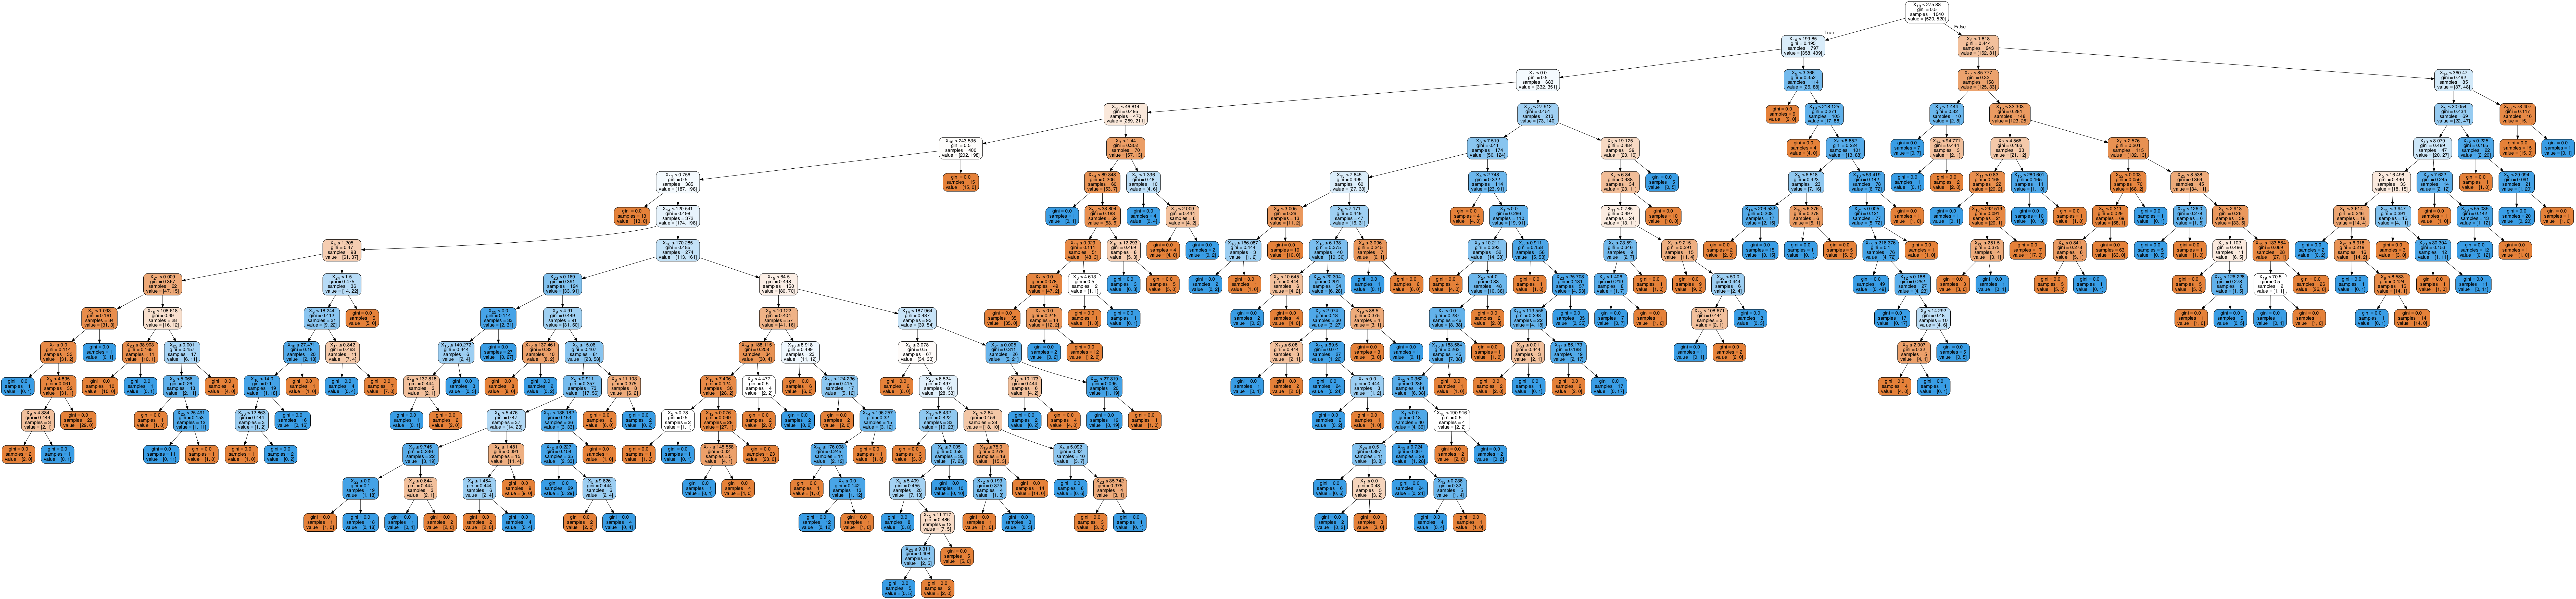

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(Xtrain_ini,ytrain_ini)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
print(Xtest_ini)
y_pred = dtree.predict(Xtest_ini)


       1         2      3      4      5      6      7      8      9      10  \
0                                                                             
1   0.135  0.000007  0.067  0.078  0.202  2.033  0.178  1.074  1.336  1.576   
1   0.143  0.000007  0.073  0.081  0.219  1.236  0.107  0.612  0.904  0.894   
1   0.162  0.000008  0.087  0.089  0.260  1.338  0.117  0.630  0.948  1.017   
1   0.140  0.000007  0.075  0.089  0.224  1.086  0.094  0.556  0.747  0.823   
1   0.150  0.000007  0.080  0.097  0.240  1.049  0.091  0.533  0.698  0.777   
..    ...       ...    ...    ...    ...    ...    ...    ...    ...    ...   
28  0.257  0.000018  0.105  0.122  0.315  5.665  0.544  2.612  3.390  5.655   
28  0.311  0.000021  0.129  0.148  0.388  5.492  0.536  2.422  2.959  5.701   
28  0.434  0.000029  0.178  0.229  0.534  5.048  0.549  2.284  3.082  5.219   
28  0.464  0.000031  0.195  0.227  0.585  4.739  0.536  2.144  2.940  4.905   
28  0.474  0.000031  0.179  0.230  0.538  5.221  0.6

In [33]:
print("Accuracy:",metrics.accuracy_score(ytest_ini, y_pred))


Accuracy: 0.47023809523809523


# Comparaison algorithme

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.410577 (0.112959)
LDA: 0.388462 (0.118328)
KNN: 0.371154 (0.086986)
CART: 0.482692 (0.079150)
NB: 0.493269 (0.212413)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

SVM: 0.000000 (0.000000)


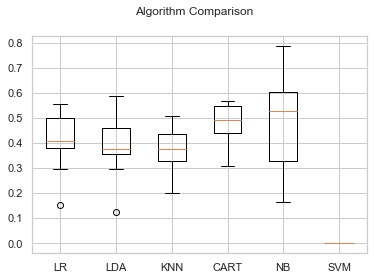

In [25]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf'))) ## linear et poly tourne en boucle sur mon ordinateur
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtrain_ini, ytrain_ini, cv=kfold, scoring=scoring) #### Pour les données brutes sans séléction 
    ### changer par Xtraina et Xtrainmean
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [7]:
print(dftrain.shape)
dfnewe = dftrain.groupby([dftrain.index]).mean()
print(dfnewe.shape)

(1040, 27)
(40, 27)


In [8]:
dfnewe

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,28
0,,,,,,,,,,,,,,,,,,,,,
1,2.319462,0.000115,1.108269,1.262692,3.324808,10.548308,1.067231,4.189692,6.317538,11.896231,...,163.319038,226.728654,171.500000,169.384615,0.005020,0.000427,17.318192,0.730769,6.825923,1.0
2,2.688038,0.000215,1.274769,1.453346,3.824231,12.371192,1.182192,5.537654,7.136808,12.699423,...,106.156192,163.935231,121.346154,119.038462,0.008001,0.000629,9.720462,0.884615,5.673423,1.0
3,3.006423,0.000131,1.631077,1.689115,4.892885,17.155731,1.494769,8.115385,10.962200,15.306125,...,173.730962,308.129154,105.769231,101.846154,0.004544,0.000763,35.108115,1.115385,13.966962,1.0
4,1.545038,0.000063,0.806769,0.828808,2.419923,10.647423,1.015308,5.114423,6.672269,9.102962,...,215.458115,272.957500,173.230769,170.846154,0.004114,0.000283,11.514115,0.884615,10.894308,1.0
5,2.749600,0.000250,1.234960,1.275200,3.704840,14.945240,1.369040,7.246840,9.553240,15.491000,...,96.887840,163.005480,55.884615,53.769231,0.009014,0.000966,23.878000,1.038462,11.456154,1.0
6,2.797154,0.000209,1.381615,1.534692,4.145192,14.133038,1.302077,5.587654,8.600538,17.095920,...,116.650846,169.448808,115.769231,113.153846,0.007436,0.000602,17.221077,1.038462,8.463385,1.0
7,2.760500,0.000215,1.358231,1.417885,4.074846,12.418423,1.152538,5.290192,7.008000,13.010600,...,110.791923,182.085846,60.346154,58.269231,0.007847,0.000804,26.624962,0.692308,8.661000,1.0
8,2.216308,0.000150,1.031192,1.055462,3.093538,11.972500,1.155462,5.377923,7.255808,10.381115,...,120.903385,175.068000,91.615385,89.769231,0.006826,0.000637,28.967808,0.615385,8.711692,1.0
9,2.032962,0.000184,0.859885,1.039731,2.579500,11.910154,1.141462,5.188500,7.267577,10.558520,...,101.458154,135.174808,67.961538,66.038462,0.009003,0.000630,19.168615,0.884615,10.464231,1.0


In [9]:
Xtrainmean = dfnewe.loc[:,:26]
ytrainmean = dfnewe.loc[:,28]
ytrainmean = ytrainmean.astype(int)



(40, 2)


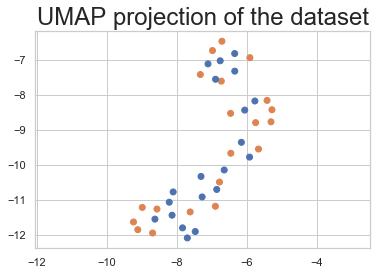

In [29]:

reducer = umap.UMAP()
embedding = reducer.fit_transform(Xtrainmean)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in ytrainmean])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);


plt.show()


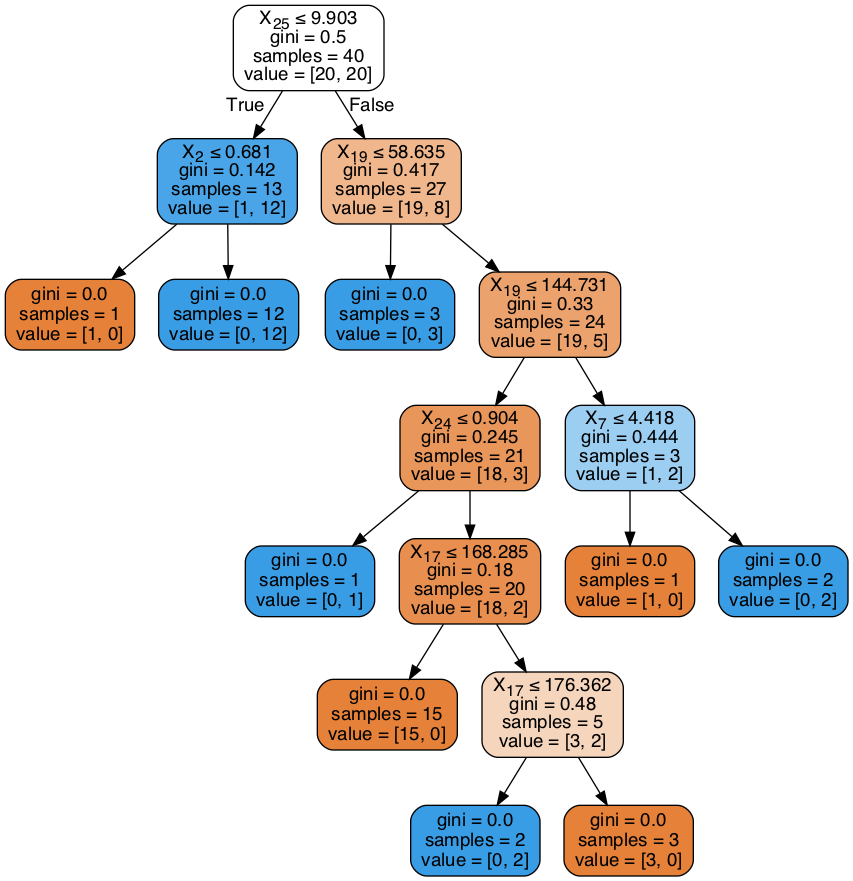

In [34]:
dtree=DecisionTreeClassifier()
dtree.fit(Xtrainmean,ytrainmean)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
y_pred = dtree.predict(Xtest_ini)
print("Accuracy:",metrics.accuracy_score(ytest_ini, y_pred))


Accuracy: 0.09523809523809523


In [36]:
KM(2,Xtrainmean,ytrainmean)

metric_homogeneity_score = 0.00794730853281036
metrics.completeness =  0.008508275694767852
metrics.v_mesure_score =  0.00821823049165395
metrics.adjusted_rand_score =  -0.013651877133105754
metrics.silouhette =  0.4336976657288691


'End'

In [37]:
clustering(2,Xtrainmean,ytrainmean,'ward')

metric_homogeneity_score = 0.01633335482157162
metrics.completeness =  0.01636287542805126
metrics.v_mesure_score =  0.01634810179810374
metrics.adjusted_rand_score =  -0.003157686994276681
metrics.silouhette =  0.42918865316583615


'End'

In [38]:
clustering(2,Xtrainmean,ytrainmean,'complete')

metric_homogeneity_score = 0.002056645228073805
metrics.completeness =  0.002260705249728443
metrics.v_mesure_score =  0.002153852779773496
metrics.adjusted_rand_score =  -0.020460358056265986
metrics.silouhette =  0.43531499378521116


'End'

In [39]:
clustering(2,Xtrainmean,ytrainmean,'average')

metric_homogeneity_score = 0.002056645228073805
metrics.completeness =  0.002260705249728443
metrics.v_mesure_score =  0.002153852779773496
metrics.adjusted_rand_score =  -0.020460358056265986
metrics.silouhette =  0.43531499378521116


'End'

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.450000 (0.244949)
LDA: 0.450000 (0.312250)
KNN: 0.375000 (0.125000)
CART: 0.725000 (0.235850)
NB: 0.500000 (0.273861)
SVM: 0.575000 (0.275000)


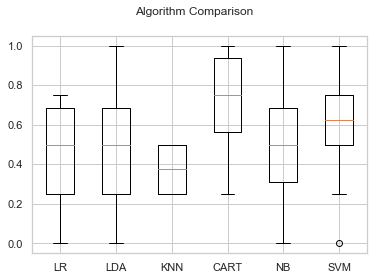

In [40]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtrainmean, ytrainmean, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
def val(n,X,Y):
    accuracy = []
    model = SVC(kernel='linear',gamma='auto')
    model.fit(X,Y)
    score = cross_val_score(model, X, Y, cv=n,scoring='accuracy')
    accuracy.append((score))
    return X,Y(accuracy)

In [42]:
a = SVC(kernel='linear',gamma='auto')
f1 = a.fit(Xtrainmean,ytrainmean)
a = f1.predict(Xtrainmean)
print(a)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1]


(40, 2)


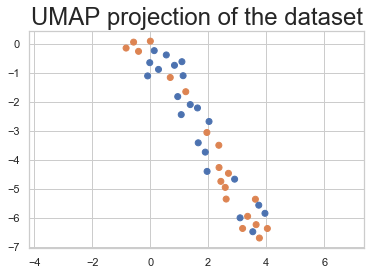

In [43]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(Xtrainmean)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in a])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);


plt.show()


In [44]:
dftrain

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,28
0,,,,,,,,,,,,,,,,,,,,,
1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,8.303,...,96.145,158.591,63,60,0.007766,0.001066,24.194,2,15.113,0
40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,11.928,...,121.490,143.797,47,44,0.007561,0.000430,46.053,1,25.792,0
40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,14.239,...,95.921,149.641,79,77,0.007767,0.000881,20.000,1,4.574,0


In [17]:
a = []
b = range(0,40)
c=0

for x in b :
    a.append(c)
    c+=26

print(a)

[0, 26, 52, 78, 104, 130, 156, 182, 208, 234, 260, 286, 312, 338, 364, 390, 416, 442, 468, 494, 520, 546, 572, 598, 624, 650, 676, 702, 728, 754, 780, 806, 832, 858, 884, 910, 936, 962, 988, 1014]


In [18]:
dfa = dftrain.iloc[[0, 26, 52, 78, 104, 130, 156, 182, 208, 234, 260, 286, 312, 338, 364, 390, 416, 442, 468, 494, 520, 546, 572, 598, 624, 650, 676, 702, 728, 754, 780, 806, 832, 858, 884, 910, 936, 962, 988, 1014]
 , : ]

In [19]:

print(dfa)


       1         2      3      4      5       6      7       8       9   \
0                                                                         
1   1.488  0.000090  0.900  0.794  2.699   8.334  0.779   4.517   4.609   
2   0.427  0.000034  0.243  0.249  0.728   7.428  0.694   4.205   4.311   
3   1.493  0.000064  0.912  0.822  2.735  11.521  1.068   5.552   7.495   
4   0.607  0.000025  0.357  0.378  1.071   9.491  0.887   5.349   5.733   
5   0.695  0.000057  0.386  0.394  1.159  17.582  1.593   9.968  11.287   
6   0.382  0.000027  0.177  0.238  0.532   5.219  0.468   2.589   2.890   
7   0.630  0.000042  0.192  0.251  0.576   5.659  0.547   2.546   3.454   
8   0.594  0.000043  0.325  0.303  0.976   5.300  0.516   2.833   3.100   
9   0.449  0.000035  0.165  0.198  0.495   3.616  0.320   1.401   2.298   
10  0.888  0.000092  0.352  0.435  1.057   5.995  0.604   2.757   3.522   
11  0.342  0.000023  0.125  0.184  0.374   3.154  0.290   1.471   1.765   
12  1.761  0.000137  1.05

In [20]:
Xtraina = dfa.loc[:,:26]
ytraina = dfa.loc[:,28]

print(Xtraina)
print(ytraina)



       1         2      3      4      5       6      7       8       9   \
0                                                                         
1   1.488  0.000090  0.900  0.794  2.699   8.334  0.779   4.517   4.609   
2   0.427  0.000034  0.243  0.249  0.728   7.428  0.694   4.205   4.311   
3   1.493  0.000064  0.912  0.822  2.735  11.521  1.068   5.552   7.495   
4   0.607  0.000025  0.357  0.378  1.071   9.491  0.887   5.349   5.733   
5   0.695  0.000057  0.386  0.394  1.159  17.582  1.593   9.968  11.287   
6   0.382  0.000027  0.177  0.238  0.532   5.219  0.468   2.589   2.890   
7   0.630  0.000042  0.192  0.251  0.576   5.659  0.547   2.546   3.454   
8   0.594  0.000043  0.325  0.303  0.976   5.300  0.516   2.833   3.100   
9   0.449  0.000035  0.165  0.198  0.495   3.616  0.320   1.401   2.298   
10  0.888  0.000092  0.352  0.435  1.057   5.995  0.604   2.757   3.522   
11  0.342  0.000023  0.125  0.184  0.374   3.154  0.290   1.471   1.765   
12  1.761  0.000137  1.05

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.525000 (0.305164)
LDA: 0.525000 (0.175000)
KNN: 0.250000 (0.193649)
CART: 0.300000 (0.217945)
NB: 0.500000 (0.295804)
SVM: 0.600000 (0.229129)


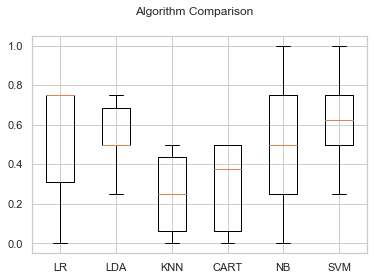

In [50]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier())) # n = 5 par défaut
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf'))) ## ici c'est celui qui fonctionne
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtraina, ytraina, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

(40, 2)


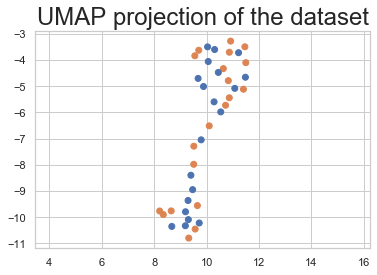

In [44]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(Xtraina)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in ytraina])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);


plt.show()


# Sélection des features

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

c = ElasticNet(alpha=0.05, l1_ratio=0.7)
f8 = c.fit(Xtraina,ytraina)
m2 = SelectFromModel(f8,prefit=True)
Xnew = m2.transform(Xtraina)
Xnew.shape

In [46]:
test = pd.DataFrame(Xnew)

In [47]:
print(test)

        0       1       2       3        4        5       6       7
0   2.699   6.802  13.551  11.130  166.533  164.781   0.000   0.000
1   0.728   5.250  12.616  15.267  124.171  123.883   0.000   0.000
2   2.735  10.720  16.657  10.744  240.722  234.117   0.000   0.000
3   1.071   6.450  16.047  13.452  245.445  246.303   0.000   0.000
4   1.159  15.725  29.905   9.041  121.641  121.347   0.752   0.000
5   0.532   4.646   7.768  16.685  141.319  141.279   0.000   0.000
6   0.576   5.046   7.637  18.186  146.808  149.804   0.000   0.000
7   0.976   4.236   8.499  15.321  140.395  139.585   0.000   0.000
8   0.495   4.359   4.202  20.476  128.534  128.787   0.000   0.000
9   1.057   5.367   8.270  14.438   96.258   96.067   5.455   0.000
10  0.374   2.828   4.413  19.167  147.918  147.518   5.932   0.000
11  3.163   9.543  19.486  10.046  128.241  128.632   0.206   0.000
12  0.600   4.255   9.331  18.291  240.232  241.014   0.806   0.000
13  0.494   6.027   8.608  17.062  150.192  150.

(40, 2)


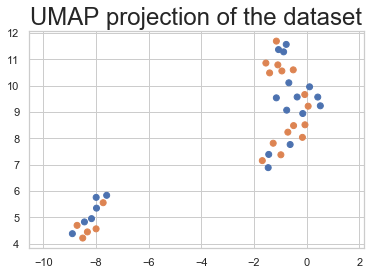

In [48]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(Xnew)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in ytraina])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);


plt.show()

In [49]:
c = ElasticNet(alpha=0.05, l1_ratio=0.7)
f8 = c.fit(Xtraina,ytraina)
m2 = SelectFromModel(f8,prefit=True)
Xnew = m2.transform(Xtraina)
Xnew.shape
test = pd.DataFrame(Xnew)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6762308622153834, tolerance: 0.001
  positive)


(40, 2)


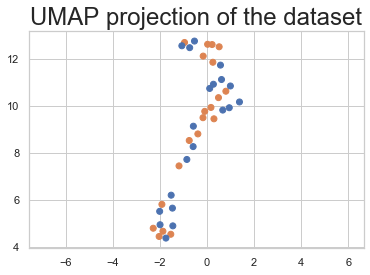

In [50]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(Xnew)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in ytraina])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);


plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.650000 (0.229129)
LDA: 0.600000 (0.229129)
KNN: 0.500000 (0.158114)
CART: 0.350000 (0.278388)
NB: 0.525000 (0.361421)
SVM: 0.650000 (0.254951)


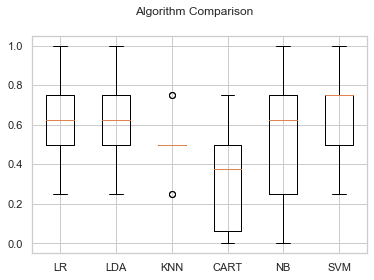

In [51]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xnew, ytraina, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

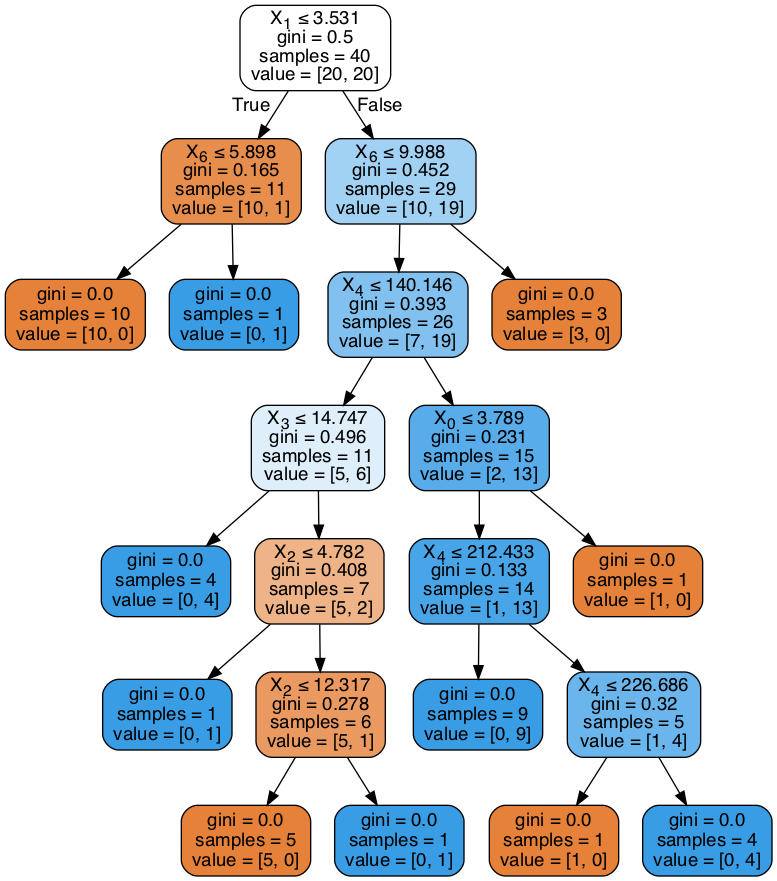

In [52]:
dtree=DecisionTreeClassifier()
dtree.fit(Xnew,ytrainmean)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [53]:
print(dfa)


       1         2      3      4      5       6      7       8       9   \
0                                                                         
1   1.488  0.000090  0.900  0.794  2.699   8.334  0.779   4.517   4.609   
2   0.427  0.000034  0.243  0.249  0.728   7.428  0.694   4.205   4.311   
3   1.493  0.000064  0.912  0.822  2.735  11.521  1.068   5.552   7.495   
4   0.607  0.000025  0.357  0.378  1.071   9.491  0.887   5.349   5.733   
5   0.695  0.000057  0.386  0.394  1.159  17.582  1.593   9.968  11.287   
6   0.382  0.000027  0.177  0.238  0.532   5.219  0.468   2.589   2.890   
7   0.630  0.000042  0.192  0.251  0.576   5.659  0.547   2.546   3.454   
8   0.594  0.000043  0.325  0.303  0.976   5.300  0.516   2.833   3.100   
9   0.449  0.000035  0.165  0.198  0.495   3.616  0.320   1.401   2.298   
10  0.888  0.000092  0.352  0.435  1.057   5.995  0.604   2.757   3.522   
11  0.342  0.000023  0.125  0.184  0.374   3.154  0.290   1.471   1.765   
12  1.761  0.000137  1.05

In [10]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel


b = linear_model.Lasso(alpha=0.01,copy_X=False)
f4 = b.fit(Xtrain_ini,ytrain_ini)

m2 = SelectFromModel(f4,prefit=True)
linear = m2.transform(Xtrain_ini)
linear.shape

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.67302062468123, tolerance: 0.026000000000000002
  positive)


(1040, 15)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.419231 (0.118640)
LDA: 0.411538 (0.121154)
KNN: 0.375000 (0.082938)
CART: 0.474038 (0.072473)
NB: 0.463462 (0.176975)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

SVM: 0.000000 (0.000000)


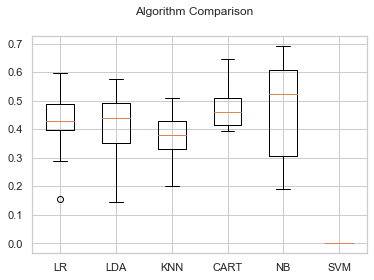

In [11]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, linear, ytrain_ini, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:

b = LinearSVC(C = 0.05,penalty="l1", dual=False)
f6 = b.fit(Xtraina,ytraina)
m2 = SelectFromModel(f6,prefit=True)
linearsvc = m2.transform(Xtraina)
linearsvc.shape

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(40, 8)

In [22]:
dtree=DecisionTreeClassifier()
dtree.fit(linear,ytrain_ini)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'StringIO' is not defined

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.475000 (0.361421)
LDA: 0.450000 (0.331662)
KNN: 0.200000 (0.217945)
CART: 0.500000 (0.223607)
NB: 0.550000 (0.331662)
SVM: 0.000000 (0.000000)


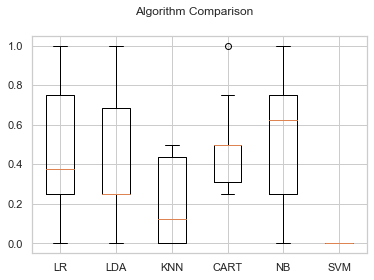

In [23]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, linearsvc, ytraina, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Correlation

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03672309 0.04279446 0.03982941 0.04438164 0.03187562 0.03431308
 0.03120705 0.03267932 0.04539355 0.0436191  0.03204115 0.05080475
 0.04079154 0.03858938 0.04452374 0.03527458 0.03716322 0.03123547
 0.03790528 0.03480095 0.03977864 0.04083582 0.04782291 0.04332721
 0.02136746 0.04092157]


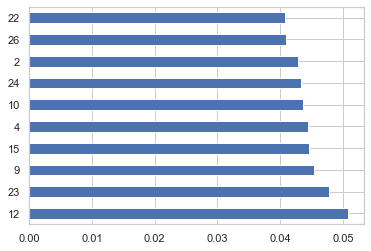

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xtrain_ini,ytrain_ini)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xtrain_ini.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

       1         2      3      4      5       6      7       8       9   \
0                                                                         
1   1.488  0.000090  0.900  0.794  2.699   8.334  0.779   4.517   4.609   
2   0.427  0.000034  0.243  0.249  0.728   7.428  0.694   4.205   4.311   
3   1.493  0.000064  0.912  0.822  2.735  11.521  1.068   5.552   7.495   
4   0.607  0.000025  0.357  0.378  1.071   9.491  0.887   5.349   5.733   
5   0.695  0.000057  0.386  0.394  1.159  17.582  1.593   9.968  11.287   
6   0.382  0.000027  0.177  0.238  0.532   5.219  0.468   2.589   2.890   
7   0.630  0.000042  0.192  0.251  0.576   5.659  0.547   2.546   3.454   
8   0.594  0.000043  0.325  0.303  0.976   5.300  0.516   2.833   3.100   
9   0.449  0.000035  0.165  0.198  0.495   3.616  0.320   1.401   2.298   
10  0.888  0.000092  0.352  0.435  1.057   5.995  0.604   2.757   3.522   
11  0.342  0.000023  0.125  0.184  0.374   3.154  0.290   1.471   1.765   
12  1.761  0.000137  1.05

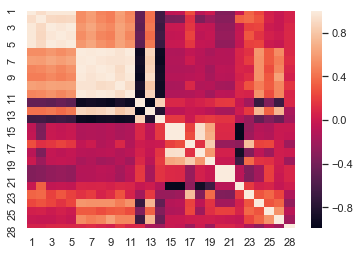

In [25]:
corr = dfa.corr()
sns.heatmap(corr)

print(dfa)

In [26]:
feattest = corr[28]

In [35]:
print(corr)


          1         2         3         4         5         6         7   \
1   1.000000  0.922271  0.978612  0.979491  0.978637  0.531100  0.605061   
2   0.922271  1.000000  0.899682  0.897122  0.899848  0.532456  0.596451   
3   0.978612  0.899682  1.000000  0.974090  1.000000  0.579359  0.642938   
4   0.979491  0.897122  0.974090  1.000000  0.974088  0.532509  0.605748   
5   0.978637  0.899848  1.000000  0.974088  1.000000  0.579431  0.643016   
6   0.531100  0.532456  0.579359  0.532509  0.579431  1.000000  0.988738   
7   0.605061  0.596451  0.642938  0.605748  0.643016  0.988738  1.000000   
8   0.491050  0.502737  0.554560  0.496697  0.554632  0.992409  0.976258   
9   0.460107  0.457359  0.506704  0.464576  0.506774  0.985733  0.960734   
10  0.618341  0.597337  0.633329  0.621291  0.633424  0.954283  0.960603   
11  0.491062  0.502747  0.554576  0.496710  0.554647  0.992409  0.976265   
12 -0.476310 -0.476079 -0.509579 -0.455702 -0.509652 -0.926432 -0.899889   
13  0.402222

In [28]:
print(dfa)

       1         2      3      4      5       6      7       8       9   \
0                                                                         
1   1.488  0.000090  0.900  0.794  2.699   8.334  0.779   4.517   4.609   
2   0.427  0.000034  0.243  0.249  0.728   7.428  0.694   4.205   4.311   
3   1.493  0.000064  0.912  0.822  2.735  11.521  1.068   5.552   7.495   
4   0.607  0.000025  0.357  0.378  1.071   9.491  0.887   5.349   5.733   
5   0.695  0.000057  0.386  0.394  1.159  17.582  1.593   9.968  11.287   
6   0.382  0.000027  0.177  0.238  0.532   5.219  0.468   2.589   2.890   
7   0.630  0.000042  0.192  0.251  0.576   5.659  0.547   2.546   3.454   
8   0.594  0.000043  0.325  0.303  0.976   5.300  0.516   2.833   3.100   
9   0.449  0.000035  0.165  0.198  0.495   3.616  0.320   1.401   2.298   
10  0.888  0.000092  0.352  0.435  1.057   5.995  0.604   2.757   3.522   
11  0.342  0.000023  0.125  0.184  0.374   3.154  0.290   1.471   1.765   
12  1.761  0.000137  1.05

In [29]:
from sklearn.feature_selection import f_regression
test = SelectKBest(f_regression, k=10).fit_transform(Xtrainmean, ytrainmean) # changer pour chaque type de données

In [30]:
test = pd.DataFrame(test)

In [31]:
print(test.shape)

(40, 10)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.450000 (0.244949)
LDA: 0.450000 (0.312250)
KNN: 0.375000 (0.125000)
CART: 0.650000 (0.278388)
NB: 0.500000 (0.273861)
SVM: 0.575000 (0.275000)


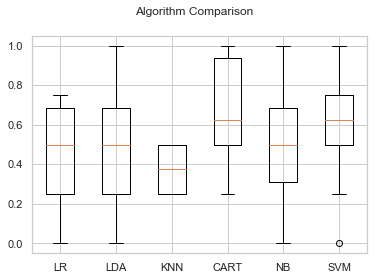

In [32]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtrainmean, ytrainmean, cv=kfold, scoring=scoring) # changer aussi
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()